In [1]:
import pandas as pd
import pandas_ta as ta
import mplfinance as mpf
import numpy as np
import mplfinance as mpf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


# 1. Read and split dataset


## Read

In [2]:
df = pd.read_csv('../clean_data/clean_amd.csv')
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)
df['Close+1'] = df['Close'].shift(-1)
df[['Close', 'Close+1']].tail(2)
df = df.drop(columns=[ 'tema_2', 'tema_8','tema_100'])
df.dropna()


,Open,High,Low,Close,Volume,NATR_3,RSI_3,ADX_3,CCI_3_0.015,ROC_3,...,MACD_12_26_9,BBL_3_2.0,BBM_3_2.0,BBU_3_2.0,BBB_3_2.0,BBP_3_2.0,min_price_3,max_price_3,mid_price,Close+1
Date,,,,,,,,,,,,,,,,,,,,,
1980-08-06 00:00:00-04:00,0.000000,4.333333,4.218750,4.239583,351600,3.193439,57.558179,67.457227,-70.588288,-0.489012,...,0.266168,4.203022,4.305555,4.408089,4.762848,0.178289,4.218750,4.416667,4.276042,4.218750
1980-08-07 00:00:00-04:00,0.000000,4.270833,4.208333,4.218750,218400,2.345345,52.183414,53.444589,-70.149217,-2.173913,...,0.264210,4.145505,4.274305,4.403105,6.026714,0.284335,4.208333,4.416667,4.239583,4.270833
1980-08-08 00:00:00-04:00,0.000000,4.333333,4.260417,4.270833,471600,2.499832,64.584952,51.885376,92.000132,-2.147972,...,0.263820,4.200247,4.243055,4.285864,2.017800,0.824443,4.208333,4.333333,4.296875,4.416667
1980-08-11 00:00:00-04:00,0.000000,4.416667,4.270833,4.416667,542400,2.859595,83.049391,57.421407,100.000000,4.176919,...,0.272142,4.134550,4.302083,4.469616,7.788452,0.841974,4.208333,4.416667,4.343750,4.354167
1980-08-12 00:00:00-04:00,0.000000,4.500000,4.333333,4.354167,445200,3.364200,62.201514,64.956983,72.222100,3.209884,...,0.270574,4.227745,4.347222,4.466700,5.496718,0.529063,4.260417,4.500000,4.416667,4.270833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-29 00:00:00-04:00,112.070000,112.760002,109.839996,111.239998,58347200,3.230614,53.049678,36.721870,100.000000,3.469441,...,0.207842,109.677250,110.599998,111.522747,1.668624,0.846790,107.080002,112.760002,111.299999,113.910004
2023-06-30 00:00:00-04:00,113.029999,114.690002,112.410004,113.910004,53331900,3.091800,74.737893,41.386671,100.000000,3.188699,...,0.207927,108.627862,111.773333,114.918804,5.628303,0.839642,107.629997,114.690002,113.550003,115.820000
2023-07-03 00:00:00-04:00,115.160004,116.730003,114.510002,115.820000,31860000,2.737813,83.109892,51.287612,94.507029,5.128439,...,0.357988,109.899988,113.656667,117.413346,6.610574,0.787932,109.839996,116.730003,115.620003,113.949997


## SPLIT DATASET 

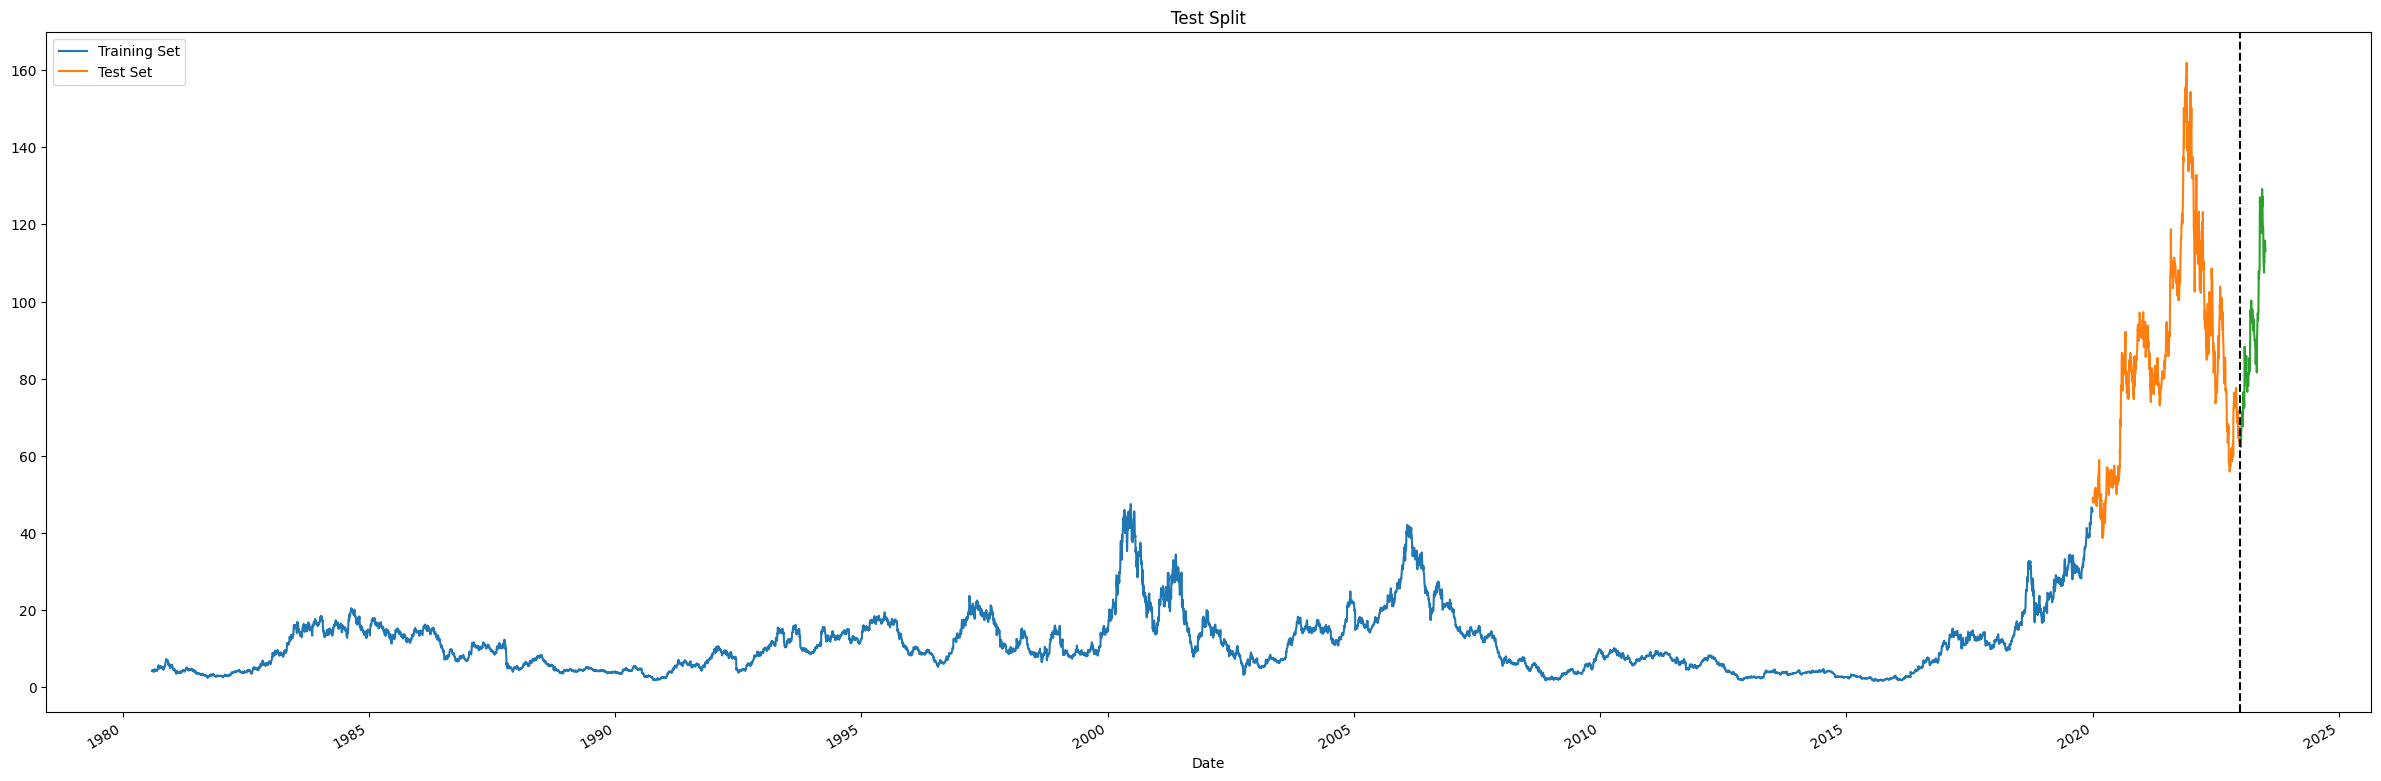

In [3]:
train = df.loc[(df.index < pd.to_datetime('2020-01-01 00:00:00-04:00'))]
test = df.loc[(df.index >= pd.to_datetime('2020-01-01 00:00:00-04:00')) & (df.index < pd.to_datetime('2023-01-01 00:00:00-04:00'))]
test_last = df.loc[df.index >=  pd.to_datetime('2023-01-01 00:00:00-04:00')]

fig, ax = plt.subplots(figsize=(30, 10))
train['Close'].plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test['Close'].plot(ax=ax, label='test Set', title='Test Split')

test_last['Close'].plot(ax=ax, label='val Set')
ax.axvline('01-01-2023', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
# plt.show()

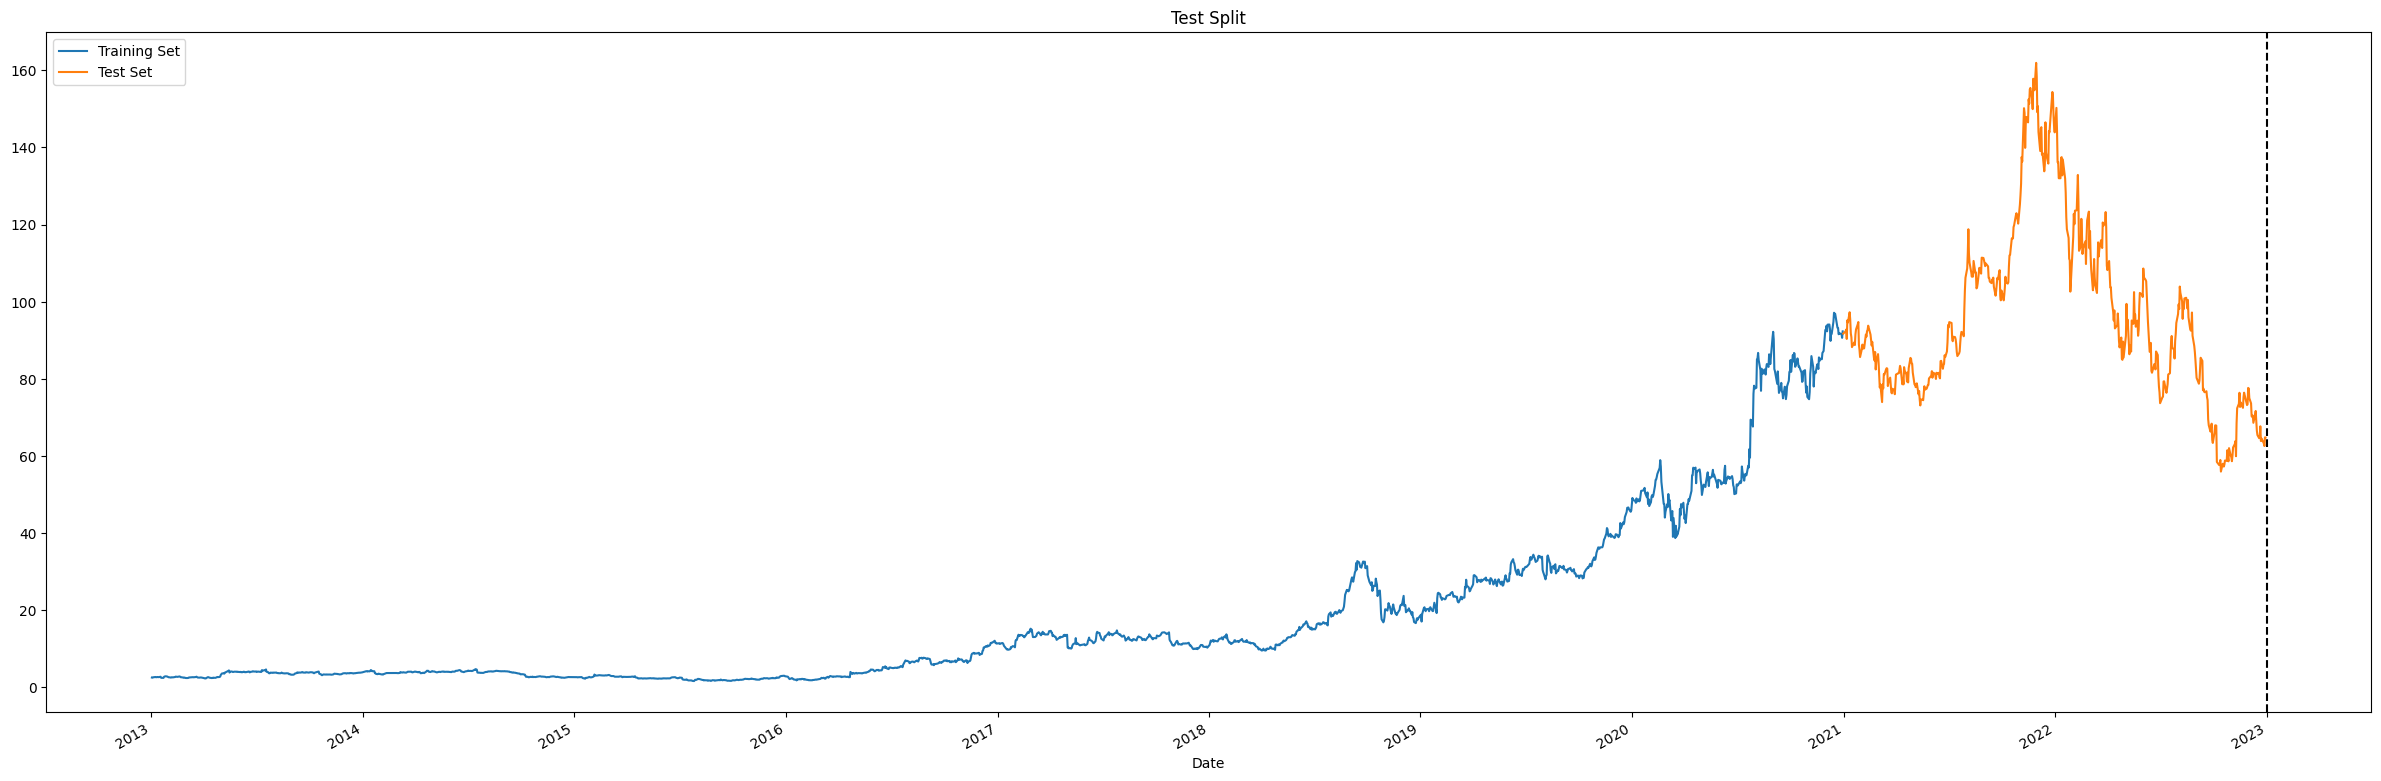

In [4]:
temp_df = df.loc[ pd.to_datetime('2013-01-01 00:00:00-04:00'): pd.to_datetime('2022-12-31 00:00:00-04:00')]
# pd.to_datetime('2023-01-01 00:00:00-04:00')
train_size = int(len(temp_df) * 0.80)
test_size = int(len(temp_df) - train_size)

train = temp_df[:train_size]
test= temp_df[train_size:]

fig, ax = plt.subplots(figsize=(30, 10))

train['Close'].plot(ax=ax, label='Training Set', title='Data Train/Test Split')
test['Close'].plot(ax=ax, label='test Set', title='Test Split')

ax.axvline('01-01-2023', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

## cross val

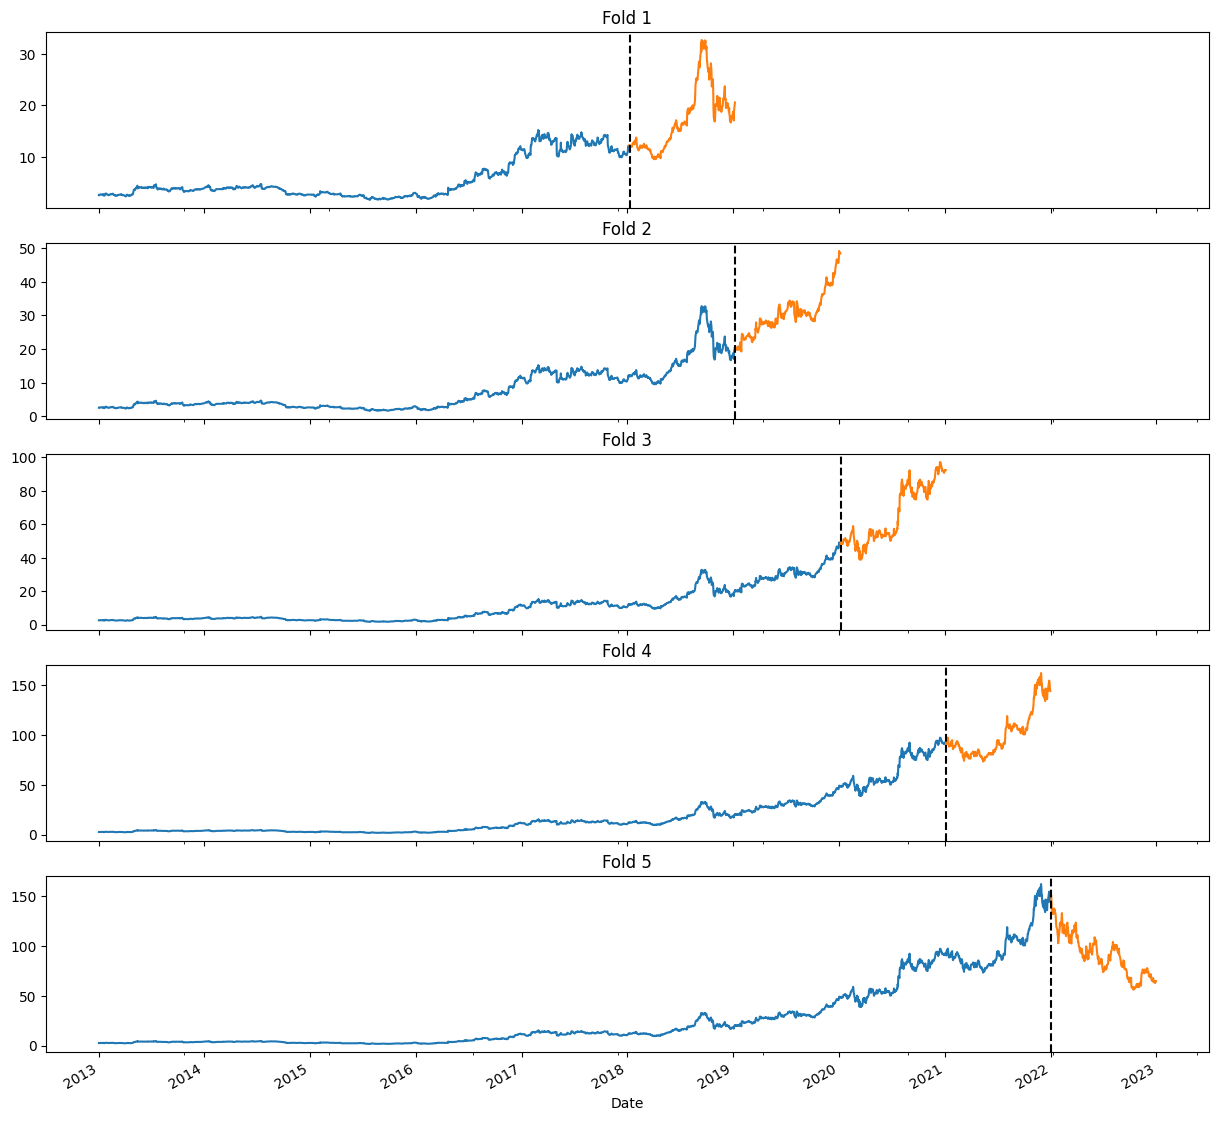

In [5]:
train = temp_df[:train_size]
test= temp_df[train_size:]

from sklearn.model_selection import TimeSeriesSplit



test_size_ratio = 0.1  # Tỷ lệ phần trăm dùng cho tập kiểm tra
test_size = int(temp_df.shape[0] * test_size_ratio)


tscv = TimeSeriesSplit(n_splits=5, test_size=test_size, gap=0)


fig, axs = plt.subplots(5, 1, figsize=(15, 15), sharex=True)
fold = 0

for train_idx, val_idx in tscv.split(temp_df.copy()):
    train = temp_df.iloc[train_idx]
    test= temp_df.iloc[val_idx]

    train["Close"].plot(ax=axs[fold], label='Training Set', title='Fold {}'.format(fold+1))
    test["Close"].plot(ax=axs[fold], label='Val Set')
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold+= 1
plt.show()

# Model

## test raw performance


In [6]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
np.random.seed(42)

In [7]:
X_train = train.copy().drop(columns=['Close+1'])
Y_train = train[['Close+1']]
X_test = test.copy().drop(columns=['Close+1'])
Y_test = test[['Close+1']]

In [8]:
svr = SVR()
svr.fit(X_train,Y_train)
Y_pred =  svr.predict(X_test)
mse = (mean_squared_error(Y_test, Y_pred))
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse,rmse}")

/usr/local/lib/python3.11/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error: (345.28654788050835, 18.581887629638395)


## scale

In [9]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#X_scaled = scaler.fit_transform(X)

X = temp_df.copy().drop(columns=['Close+1'])
X_scaled = scaler.fit_transform(X)

y = temp_df[['Close+1']]

## fine tune

In [10]:
import warnings
from sklearn.exceptions import ConvergenceWarning,DataConversionWarning

# Filter out DataConversionWarning
warnings.filterwarnings("ignore", category=DataConversionWarning)

# Filter out ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [11]:
# from sklearn.model_selection import  GridSearchCV

# # param_grid = {
# #     'C': [0.1],
# #     'epsilon': [0.1],
# #     'kernel': ['linear']
# # }
# param_grid={
#     'C':[0.0001,0.001,0.01,0.1,1,10, 100], 
#     'kernel': ['linear','rbf','poly'],
#     'max_iter': [1000],
#     'gamma':[0.0001,0.001,0.01,0.1,1,10, 100], 
#     'degree':[1,2,3,4,5],
#      'max_iter': [1000]
# }



# # Define the number of splits for time series cross-validation
# n_splits = 10
# tscv = TimeSeriesSplit(n_splits=n_splits)

# # Create the SVR model
# svr = SVR()

# # Perform grid search with cross-validation
# grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=tscv)
# grid_search.fit(X_scaled, y)

# # Print the best parameter combination and the corresponding mean squared error
# print("Best Parameters: ", grid_search.best_params_)
# print("Best Mean Squared Error: ", (-grid_search.best_score_))

In [12]:
# scores = grid_search.cv_results_
# mean_scores = scores['mean_test_score']
# params = scores['params']

# # Sort the scores and parameters based on the mean scores in descending order
# sorted_indices = np.argsort(mean_scores)[::-1]
# sorted_mean_scores = mean_scores[sorted_indices]
# sorted_params = [params[i] for i in sorted_indices]

# lim = 0
# # Print the sorted mean scores and corresponding parameters
# for mean_score, param in zip(sorted_mean_scores, sorted_params):
#     print(mean_score, '----', param)
#     lim +=1 
#     if lim ==30:
#         break
#     # if param['kernel'] == 'linear' and param['C'] == 1.0 and param['gamma'] == 0.001:
      
#     #     print(mean_score, '----', param)


In [13]:
# print(zip(sorted_mean_scores, sorted_params))

NameError: name 'sorted_mean_scores' is not defined

1.0691979671428966
0.14181118451990204
0.2224328085910821
0.19154450642759033
0.2873753354393768
0.7994387622118193
1.256775331715611
6.0921199914557445
10.507394964049885
15.64027315458748


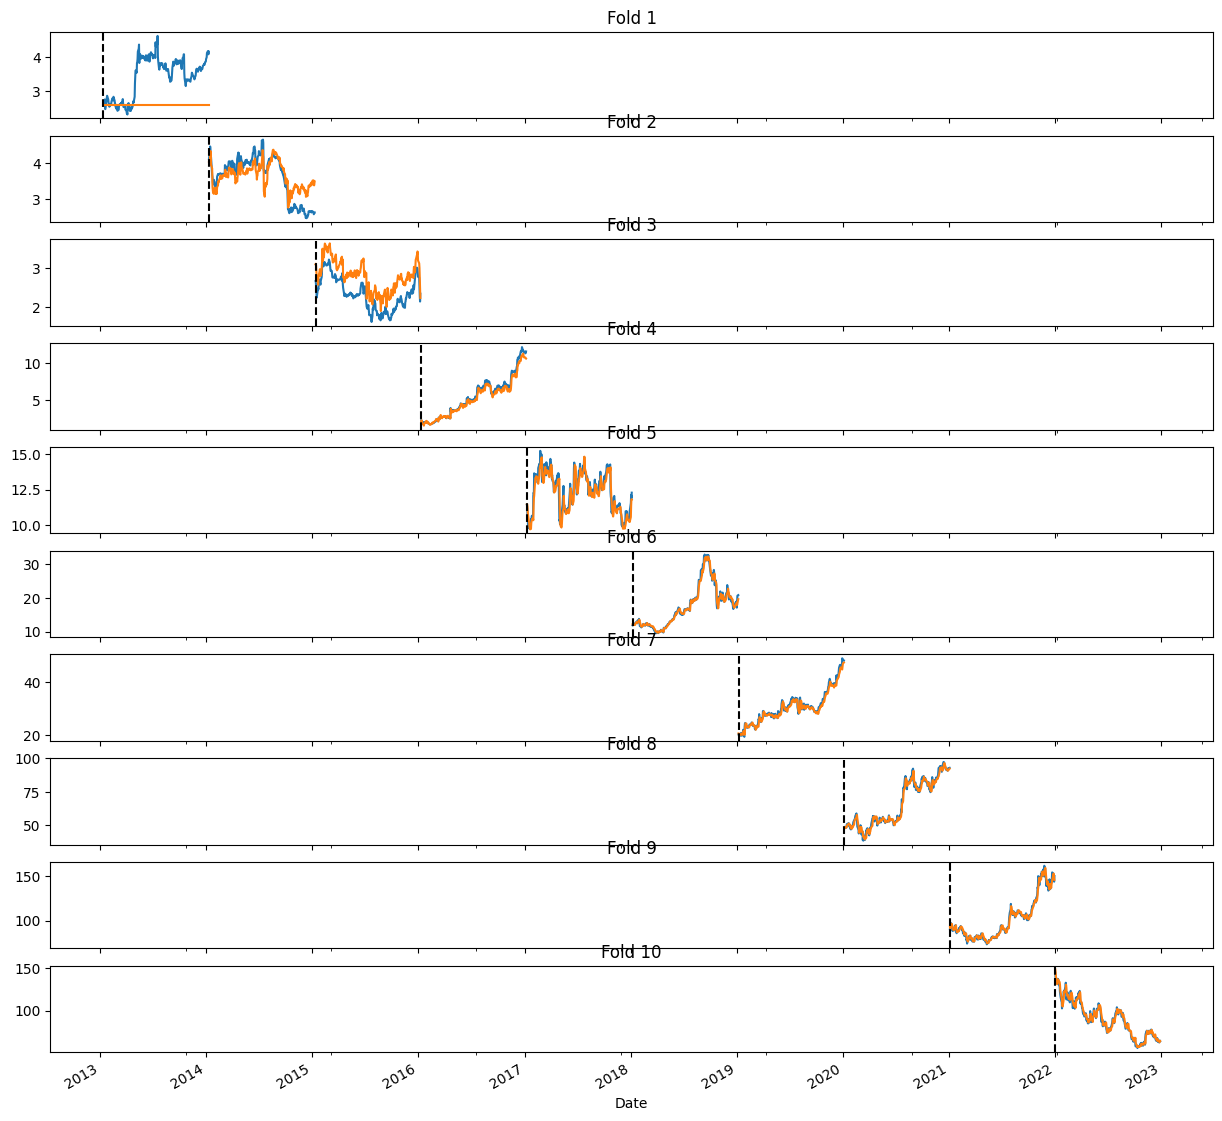

36.20836400614138


In [18]:
train = temp_df[:train_size]
test= temp_df[train_size:]

from sklearn.model_selection import TimeSeriesSplit



test_size_ratio = 0.1  # Tỷ lệ phần trăm dùng cho tập kiểm tra
test_size = int(temp_df.shape[0] * test_size_ratio)


tscv = TimeSeriesSplit(n_splits=10, test_size=test_size, gap=0)


fig, axs = plt.subplots(10, 1, figsize=(15, 15), sharex=True)
fold = 0

mean_val = 0
for train_idx, val_idx in tscv.split(temp_df.copy()):

    svr =SVR(C=1, degree= 1, kernel='linear', max_iter= 5000)
    #'C': 0.1, 'degree': 1, 'gamma': 10, 'kernel': 'poly', 'max_iter': 1000

    train = temp_df.iloc[train_idx]
    test= temp_df.iloc[val_idx]
    X_train = train.copy().drop(columns=['Close+1'])

    scaler_cv = StandardScaler()
    scaler_cv.fit(X_train)
    x_train_scaled = scaler.transform(X_train)
    y_train = train[['Close+1']]
    X_test = test.copy().drop(columns=['Close+1'])
    X_test_scaled = scaler.transform(X_test)

    y_test = test[['Close+1']]
    
    svr.fit(x_train_scaled, y_train)

    y_pred = svr.predict(X_test_scaled)

    result = test.copy()
    result['pred'] = y_pred
    
    result["Close+1"].plot(ax=axs[fold], label='Training Set', title='Fold {}'.format(fold+1))
    result["pred"].plot(ax=axs[fold], label='Val Set')
    print(mean_squared_error(y_pred, y_test))
    mean_val+= mean_squared_error(y_pred, y_test)
    axs[fold].axvline(test.index.min(), color='black', ls='--')
    fold+= 1
plt.show()
print(mean_val)

In [15]:
test_last = test_last.dropna()

svr =SVR(C=1, kernel= 'linear', max_iter= 5000)
X_train = temp_df.copy().drop(columns=['Close+1'])
y_train = temp_df[['Close+1']]
#scale train
final_scaler = StandardScaler()
final_scaler.fit(X_train)
X_train_scaled = final_scaler.transform(X_train)
#scale test
X_test_last = test_last.copy().drop(columns=['Close+1'])
y_test_last = test_last[['Close+1']]

X_test_last_scale = final_scaler.transform(X_test_last)

svr.fit(X_train_scaled,y_train)
y_pred = svr.predict(X_test_last_scale)


df_plot = y_test_last.copy()
df_plot['pred'] = y_pred




In [16]:
rmse = np.sqrt(mean_squared_error(y_pred,y_test_last))
mape = np.abs((df_plot['pred']-df['Close+1'])/df_plot['Close+1'])
mape = (mape.mean())
print(f'RMSE: {rmse}')
print(f'MAPE: {mape}')

RMSE: 3.3797612401043007
MAPE: 0.025970356855193177


<Axes: xlabel='Date'>

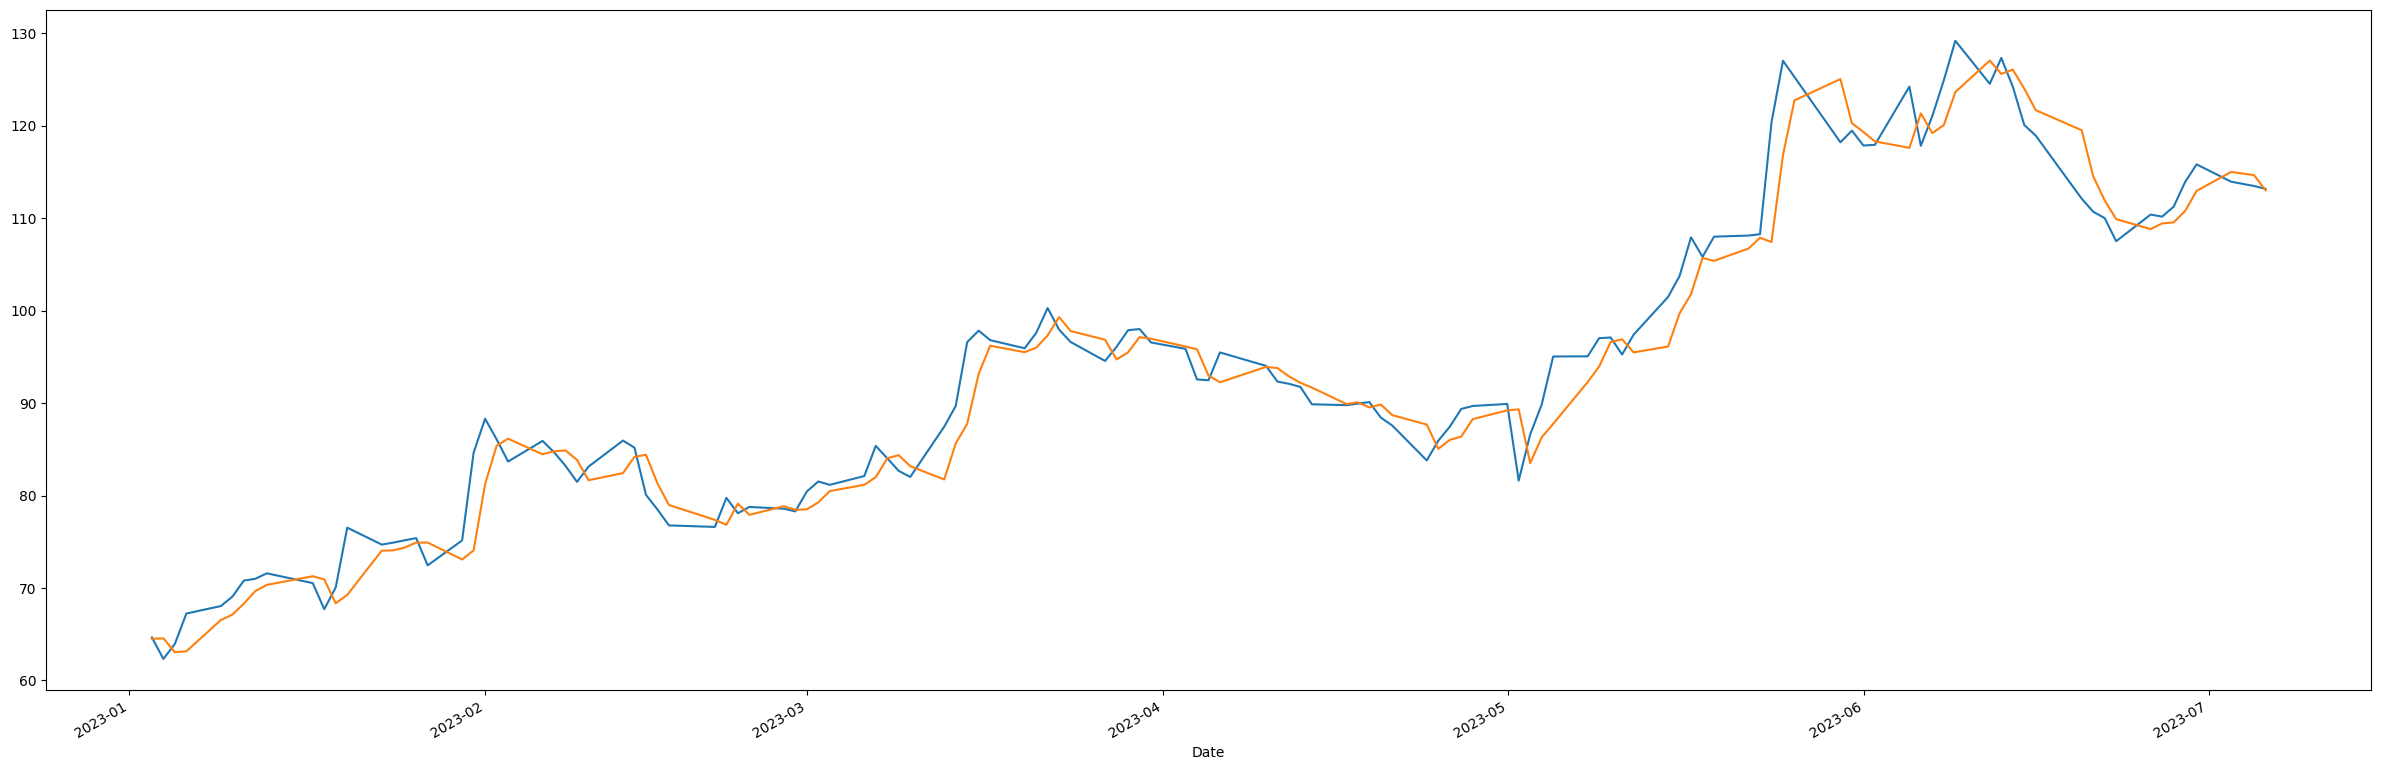

In [17]:
fig, ax = plt.subplots(figsize=(30, 10))
df_plot['Close+1'].plot(ax=ax, label='actual')
df_plot['pred'].plot(ax=ax, label='predict')

